<img src="images/usm.jpg" width="480" height="240" align="left"/>

# MAT281 - Laboratorio N°06

## Objetivos de la clase

* Reforzar los conceptos básicos del E.D.A..

## Contenidos

* [Problema 01](#p1)


## Problema 01
<img src="./images/logo_iris.jpg" width="360" height="360" align="center"/>

El **Iris dataset** es un conjunto de datos que contine una  muestras de tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor). Se midió cuatro rasgos de cada muestra: el largo y ancho del sépalo y pétalo, en centímetros.

Lo primero es cargar el conjunto de datos y ver las primeras filas que lo componen:

In [31]:
# librerias
 
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', 500)  # Ver más columnas de los dataframes


# Ver gráficos de matplotlib en jupyter notebook/lab
%matplotlib inline

In [21]:
# cargar datos
df = pd.read_csv(os.path.join("data","iris_contaminados.csv"))
df.columns = ['sepalLength',
                  'sepalWidth',
                  'petalLength',
                  'petalWidth',
                  'species']

df.head() 

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,4.4,3.2,1.3,3.0,setosa
1,7.2,3.6,6.1,2.5,virginica
2,6.3,3.3,6.0,2.5,VIRGINICA
3,6.7,3.3,5.7,2.5,virginica
4,6.3,3.4,5.6,2.4,virginica


### Bases del experimento

Lo primero es identificar las variables que influyen en el estudio y la naturaleza de esta.

* **species**: 
    * Descripción: Nombre de la especie de Iris. 
    * Tipo de dato: *string*
    * Limitantes: solo existen tres tipos (setosa, virginia y versicolor).
* **sepalLength**: 
    * Descripción: largo del sépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 4.0 y 7.0 cm.
* **sepalWidth**: 
    * Descripción: ancho del sépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 2.0 y 4.5 cm.
* **petalLength**: 
    * Descripción: largo del pétalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 1.0 y 7.0 cm.
* **petalWidth**: 
    * Descripción: ancho del pépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 0.1 y 2.5 cm.

Su objetivo es realizar un correcto **E.D.A.**, para esto debe seguir las siguientes intrucciones:

1. Realizar un conteo de elementos de la columna **species** y corregir según su criterio. Reemplace por "default" los valores nan..

## Respuesta:

In [22]:
len(df['species'].unique())

11

Notar que al determinar cuántos tipos de especies tenemos en el conjunto de datos obtenemos 11. Se aprecia arriba que hay nombres en mayúscula y otros en minúsculas. Por tanto se corregirá las mayúsculas y se determinará denuevo el número de especies.

In [40]:
df['species']=df['species'].str.lower()
len(df['species'].unique())
df['species'].unique()

array(['setosa', ' virginica', 'virginica', 'virginica ', 'versicolor',
       nan], dtype=object)

Se aprecia que tenemos un problema con la especie virginica, pues algunos datos están almacenados con un espacio en el nombre.

In [23]:
len(df['species'][df['species'].isnull()])

1

In [48]:
df['species'][df['species'].isnull()]

87    NaN
Name: species, dtype: object

In [58]:
df['species'][87]='default'

C:\Users\arave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [59]:
len(df['species'][df['species'].isnull()])

0

Ya no tenemos valores nan, pues ahora el nombre de esta observación está identificado por 'default'

In [60]:
df['species']=df['species'].map(lambda x: x.replace(' ', ''))
df['species'].unique()

array(['setosa', 'virginica', 'versicolor', 'default'], dtype=object)

Con esto tenemos corregidas la columna de 'species'.

2. Realizar un gráfico de box-plot sobre el largo y ancho de los petalos y sépalos. Reemplace por **0** los valores nan.

## Respuesta: 

Para esto se utilizarán los gráficos de caja de Seaborn.

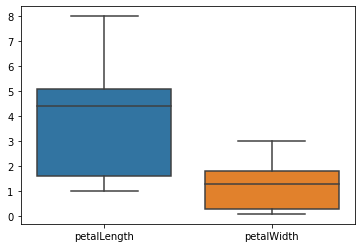

In [62]:
stats_df = df.drop(['sepalLength', 'sepalWidth'], axis=1)
sns.boxplot(data=stats_df)

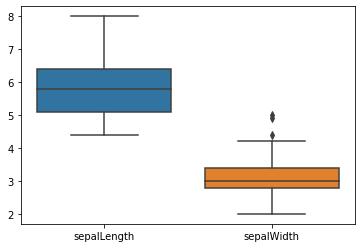

In [63]:
stats_df = df.drop(['petalLength', 'petalWidth'], axis=1)
sns.boxplot(data=stats_df)

3. Anteriormente se define un rango de valores válidos para los valores del largo y ancho de los petalos y sépalos. Agregue una columna denominada **label**  que identifique cuál de estos valores esta fuera del rango de valores válidos.

## Respuesta:

In [93]:
df.describe()

,sepalLength,sepalWidth,petalLength,petalWidth,label
count,149.000000,149.000000,149.000000,149.00000,150.000000
mean,5.867114,3.086577,3.825503,1.22953,0.886667
std,0.836050,0.486251,1.823686,0.78753,0.318062
min,4.400000,2.000000,1.000000,0.10000,0.000000
25%,5.100000,2.800000,1.600000,0.30000,1.000000
50%,5.800000,3.000000,4.400000,1.30000,1.000000
75%,6.400000,3.400000,5.100000,1.80000,1.000000
max,8.000000,5.000000,8.000000,3.00000,1.000000


A partir de la información de esta tabla vemos que:
- En sepalLenght el máximo es 8 cm, de donde se sigue que hay datos que sobrepasan los 7 cm que es el límite establecido para analizar la muestra.
- En sepalWidth el máximo es 5 cm y el límite establecido corresponde a 4.5 cm
- En petalLength el máximo es 8 cm y el límite establecido corresponde a 7 cm
- En petalWidth el máximo es 3 cm y el límite establecido corresponde a 2.5 cm 

Por tanto se determinará cuantos elementos no son necesarios para luego evaluar cómo se añadirá la columna 'Label'. Para ello solo nos fijaremos en aquellos filas que pasen los valores máximos establecidos pues de la tabla anterior se aprecia que ningun valor es menor que los valores inferiores establecidos.

In [94]:
len(df['sepalLength'][df['sepalLength']>7])

13

In [95]:
len(df['sepalWidth'][df['sepalWidth']>4.5])

2

In [96]:
len(df['petalLength'][df['petalLength']>7])

2

In [97]:
len(df['petalWidth'][df['petalWidth']>2.5])

2

De aquí se ve que a lo más 19 datos escapan de los límites establecidos. Se definirá label como una serie de 0 y 1 donde 0 indicará que los valores no están entre los límites establecidos. 

In [98]:
label=pd.Series( np.ones( len(df)) ) #CONSTRUIMOS LA SERIE LABEL
for i in range(len(df)):
    if (df['sepalLength'][i]>7) or (df['sepalWidth'][i]>4.5) or (df['petalLength'][i]>7) or (df['petalWidth'][i]>2.5):
        label[i]=0
df['label']=label
df.head()

,sepalLength,sepalWidth,petalLength,petalWidth,species,label
0,4.4,3.2,1.3,3.0,setosa,0.0
1,7.2,3.6,6.1,2.5,virginica,0.0
2,6.3,3.3,6.0,2.5,virginica,1.0
3,6.7,3.3,5.7,2.5,virginica,1.0
4,6.3,3.4,5.6,2.4,virginica,1.0


In [84]:
len(df['label'][df['label']==0])

17

Se obtiene lo esperado; esto es, a lo más 19 filas no estarán dentro de los rangos establecidos.

4. Realice un gráfico de *sepalLength* vs *petalLength* y otro de *sepalWidth* vs *petalWidth* categorizados por la etiqueta **label**. Concluya sus resultados.

## Respuesta:

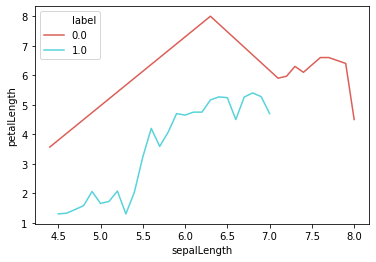

In [85]:
palette = sns.color_palette("hls", 2)

sns.lineplot(
    x='sepalLength',
    y='petalLength',
    hue='label',# color por Generation
    data=df,
    ci = None,
    palette=palette
)

Se aprecia una relación directa y fuerte entre el largo del pétalo y el largo del sépalo para las observaciones entre los límites establecidos mientras que los datos fuera de los límites no reflejan esta relación. 

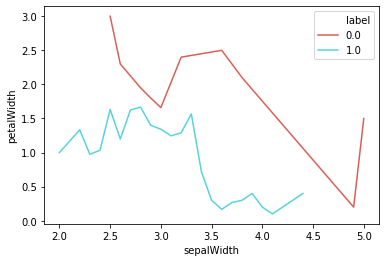

In [86]:
palette = sns.color_palette("hls", 2)

sns.lineplot(
    x='sepalWidth',
    y='petalWidth',
    hue='label',# color por Generation
    data=df,
    ci = None,
    palette=palette
)

En este caso se aprecia una relación inversa y débil  ( aunque no tan clara ) para ambos conjuntos de datos, tanto aquellos que están dentro de los límites establecidos como aquellos fuera.

Que los comportamientos no se puedan observar tan claramente, se puede deber a que se están visualizando los datos de 3 especies distintas en un mismo gráfico.

5. Filtre los datos válidos y realice un gráfico de *sepalLength* vs *petalLength* categorizados por la etiqueta **species**.

## Respuesta:

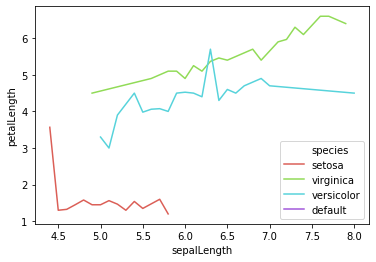

In [92]:
df_filtrado=df['label'][df['label']==1]

palette = sns.color_palette("hls", 4)

sns.lineplot(
    x='sepalLength',
    y='petalLength',
    hue='species',# color por Generation
    data=df,
    ci = None,
    palette=palette
)

En esta ocasión, habiendo filtrado los datos y graficado el largo del pétalo en función del largo del sépalo para cada especie, se aprecia que:
 - Para la especie Setosa, la relación no es tan clara. 
 - Para la especie Virginica, la relación es directa.
 - Para la especie Versicolor, la relación es directa.